<a href="https://colab.research.google.com/github/YuriSerhiienko/data_science_hw2/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
books_df = pd.read_csv('bestsellers with categories.csv')

In [ ]:
books_df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [2]:
print(books_df.isnull().sum())

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [4]:
print(books_df['Genre'].unique())

['Non Fiction' 'Fiction']


<Axes: ylabel='Frequency'>

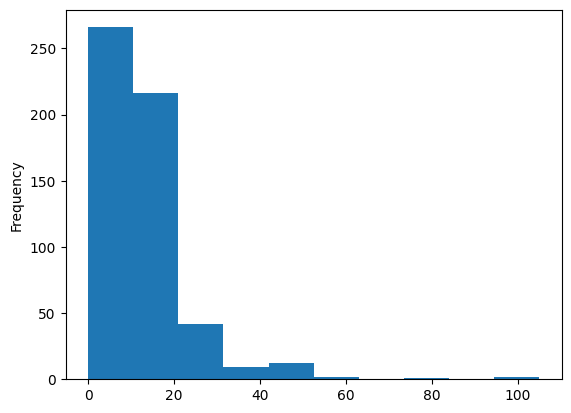

In [6]:
books_df['Price'].plot(kind='hist')

In [7]:
print('Максимальна ціна:', books_df['Price'].max())
print('Мінімальна ціна:', books_df['Price'].min())
print('Середня ціна:', books_df['Price'].mean())
print('Медіанна ціна:', books_df['Price'].median())


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [9]:
max_rating = books_df['User Rating'].max()
print('Найвищий рейтинг:', max_rating)


Найвищий рейтинг: 4.9


In [11]:
max_rating_count = books_df[books_df['User Rating'] == max_rating].shape[0]
print('Кількість книг з найвищим рейтингом:', max_rating_count)


Кількість книг з найвищим рейтингом: 52


In [12]:
most_reviewed_book = books_df[books_df['Reviews'] == books_df['Reviews'].max()]['Name'].iloc[0]
print('Книга з найбільшою кількістю відгуків:', most_reviewed_book)


Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [14]:
most_expensive_2015 = books_df[books_df['Year'] == 2015].sort_values(by='Price', ascending=False).iloc[0]
print('Найдорожча книга у 2015 році:', most_expensive_2015['Name'])


Найдорожча книга у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


In [15]:
fiction_books_2010 = books_df[(books_df['Year'] == 2010) & (books_df['Genre'] == 'Fiction')].shape[0]
print('Кількість книг жанру Fiction у 2010 році:', fiction_books_2010)


Кількість книг жанру Fiction у 2010 році: 20


In [16]:
high_rating_books = books_df[(books_df['User Rating'] == 4.9) & ((books_df['Year'] == 2010) | (books_df['Year'] == 2011))].shape[0]
print('Кількість книг з рейтингом 4.9 за 2010 та 2011 роки:', high_rating_books)


Кількість книг з рейтингом 4.9 за 2010 та 2011 роки: 1


In [18]:
cheap_books_2015 = books_df[(books_df['Year'] == 2015) & (books_df['Price'] < 8)].sort_values(by='Price', ascending=True)
print('Книга з найменшою ціною у 2015 році:', cheap_books_2015['Name'].iloc[-1])


Книга з найменшою ціною у 2015 році: Old School (Diary of a Wimpy Kid #10)


In [20]:
price_by_genre = books_df.groupby('Genre')['Price'].agg(['max', 'min'])
print(price_by_genre)


             max  min
Genre                
Fiction       82    0
Non Fiction  105    0


In [21]:
books_by_author = books_df.groupby('Author')['Name'].agg(['count'])
print('Кількість книг для кожного автора:\n', books_by_author)


Кількість книг для кожного автора:
                             count
Author                           
Abraham Verghese                2
Adam Gasiewski                  1
Adam Mansbach                   1
Adir Levy                       1
Admiral William H. McRaven      1
...                           ...
Walter Isaacson                 3
William Davis                   2
William P. Young                2
Wizards RPG Team                3
Zhi Gang Sha                    2

[248 rows x 1 columns]


In [22]:
average_rating_by_author = books_df.groupby('Author')['User Rating'].agg(['mean'])
print('Середній рейтинг для кожного автора:\n', average_rating_by_author)


Середній рейтинг для кожного автора:
                                 mean
Author                              
Abraham Verghese            4.600000
Adam Gasiewski              4.400000
Adam Mansbach               4.800000
Adir Levy                   4.800000
Admiral William H. McRaven  4.700000
...                              ...
Walter Isaacson             4.566667
William Davis               4.400000
William P. Young            4.600000
Wizards RPG Team            4.800000
Zhi Gang Sha                4.600000

[248 rows x 1 columns]


In [23]:
author_stats = pd.concat([books_by_author, average_rating_by_author], axis=1)
print('З\'єднані авторські статистики:\n', author_stats)


З'єднані авторські статистики:
                             count      mean
Author                                     
Abraham Verghese                2  4.600000
Adam Gasiewski                  1  4.400000
Adam Mansbach                   1  4.800000
Adir Levy                       1  4.800000
Admiral William H. McRaven      1  4.700000
...                           ...       ...
Walter Isaacson                 3  4.566667
William Davis                   2  4.400000
William P. Young                2  4.600000
Wizards RPG Team                3  4.800000
Zhi Gang Sha                    2  4.600000

[248 rows x 2 columns]


In [25]:
sorted_authors = author_stats.sort_values(by=['count', 'mean'], ascending=[True, True])
print('Перший автор у відсортованому списку:', sorted_authors.index[0])


Перший автор у відсортованому списку: Muriel Barbery


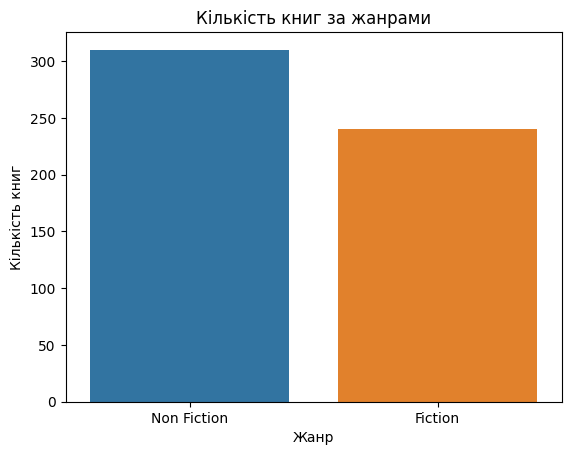

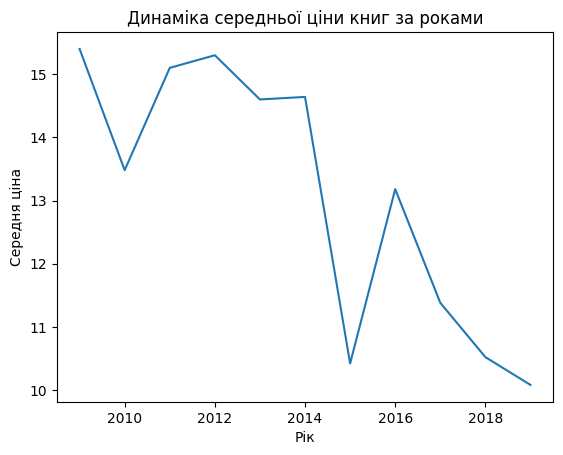

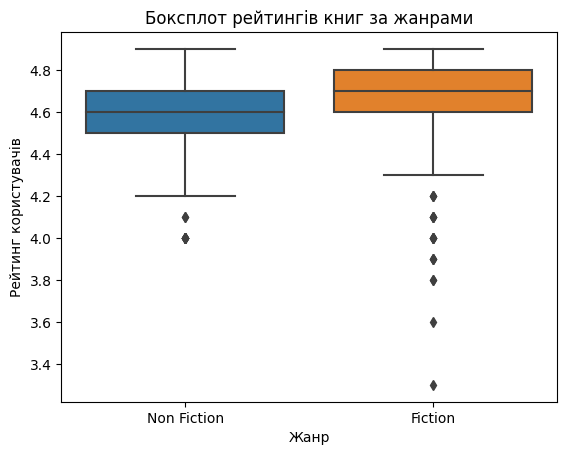

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Припустимо, 'books_df' це ваш датафрейм з даними про книги
# books_df = pd.read_csv('your_file.csv')  # Замініть на вірний шлях до файлу

# Графік 1: Стовпчикова діаграма кількості книг за жанрами
sns.countplot(x='Genre', data=books_df)
plt.title('Кількість книг за жанрами')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')
plt.show()

# Графік 2: Лінійний графік динаміки середньої ціни книг за роками
books_df.groupby('Year')['Price'].mean().plot()
plt.title('Динаміка середньої ціни книг за роками')
plt.xlabel('Рік')
plt.ylabel('Середня ціна')
plt.show()

# Графік 3: Боксплот рейтингів книг за жанрами
sns.boxplot(x='Genre', y='User Rating', data=books_df)
plt.title('Боксплот рейтингів книг за жанрами')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг користувачів')
plt.show()
